# Introduction
This notebook is part of my dive into Quantum Computing using qiskit.
I've implemented some of my own libraries to make my usage of qiskit feel
a little more intuitive (to me).

Some background on me, I have been working at Intel for roughly 5
years at the time of writing. In all that time I have been working
in the embedded systems world, that is reading proprietary datasheets and
designing firmware that manages our (very complex) device over
4 generations of the product. Though I occaisionally work with
people that do know their way around circuits, I myself have only
a vague understanding. I do know a system as complex as ours is a mix
of 3rd party peripherals + some proprietary verilog & board design
to tie them together + my firmware to configure the hardware and
manage the device operation. I've written plenty of other software,
but the most experience I have on circuits is a course from college
on computer architecture!

# Encoding Information
Quantum Computers are based on storing information as 1's and 0's just like classical computers.
Therefore we still need to encode data the same way, with little endian integers.

I am age 26.

26 in binary is 11010

Modeling 26 in quantum circuit in qiskit looks like this:

In [18]:
from qiskit import QuantumCircuit
# 26 only requires 5 bits, so create a circuit with 5 bits
num_qubits = 5
qc_age = QuantumCircuit(num_qubits)
qc_age.x([1, 3, 4])
# and to get an output result, we need to add a measurement
qc_age.measure_all()
qc_age.draw()

░ ┌─┐            
   q_0: ──────░─┤M├────────────
        ┌───┐ ░ └╥┘┌─┐         
   q_1: ┤ X ├─░──╫─┤M├─────────
        └───┘ ░  ║ └╥┘┌─┐      
   q_2: ──────░──╫──╫─┤M├──────
        ┌───┐ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ X ├─░──╫──╫──╫─┤M├───
        ├───┤ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ X ├─░──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════╩══╩══╩══╩══╩═
                 0  1  2  3  4

Now let's meausre the output of this circuit

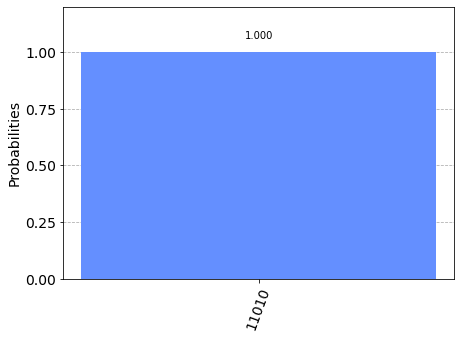

In [17]:
# Homemade wrapper for qiskit's quantum simulator
from qasm_simulator import QasmSimuluator
from qiskit.visualization import plot_histogram
sim = QasmSimuluator()
result = sim.run_circuit(qc_age)
plot_histogram(result.get_counts())

And we see that it measured 11010 100% of the time! As it should since we're not applying any quantum gates.

# Half Adder
Above was just an example of encoding information in bits. But we already
know how data is stored in binary. Let's get into the circuits now!

Adding bits looks a little something like this.
Let's say 26 + 13

26 = 11010
13 = 01101

Addition in binary would look something like this...
```
     Carry|   110000
Operand 26|   011010
Operant 13| + 001101
    Result| = 100110
```

If we perform the top down math as we do with normal numbers, we get this result:
The carry occurs when we need to add bits 1 + 1, the result is 10. Which means we write 0 in
the result and carry the 1 to the next column.

This means to add 2 bits, we get a table like this:

| A | B | Result | Carry | bit |
| - | - | :----: | ----- | --- |
| 0 | 0 |   00   | 0     |   0 |
| 0 | 1 |   01   | 0     |   1 |
| 1 | 0 |   01   | 0     |   1 |
| 1 | 1 |   10   | 1     |   0 |

From this truth table we can see that the final bit is actually just `A XOR B` and the carry flag is `A AND B`

This can be modeled as a classical circuit this way:

TODO: Insert logism screenshot

In Quantum Computers, XOR has been renamed to CNOT for some reason unknown to me.

